In [33]:
import os
import numpy as np
from keras import models
from keras import layers
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dense, Flatten, BatchNormalization
from keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.applications import VGG16, Xception

In [34]:
conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(150, 150, 3))

In [35]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [37]:
#1. X_train버전 스킵
# X_train = np.zeros((1,150,150,3))
# for i in range(5):
#     x = np.random.randn(1,150,150,3)
#     X_train = np.concatenate([X_train,x])
# X_train = X_train[1:]

#2. 일단 스킵
# ex_X = np.zeros((1,150,150,3))
# for i in range(5):
#     x = np.random.randn(1,150,150,3)
#     x = conv_base.predict(ex_X)
#     ex_X = np.concatenate([ex_X,x])
# ex_X = ex_X[1:]

# aa=conv_base.predict(ex_X)
# aa.shape

In [38]:
# # dataset load #original_dir = '/Users/user/Desktop/수업노트/이강욱강사/9.DeepLearning/006975-master/'
# original_dir = '/Users/user/Desktop/수업노트/이강욱강사/9.DeepLearning/006975-master/'
# os.chdir(original_dir)
# X_train = np.load('X_train.npy') #증식시킨데이터
X_train = np.load('./datasets/X_train_ag.npy') 
X_test = np.load('./datasets/X_test.npy')
X_val = np.load('./datasets/X_val.npy')
# y_train = np.load('y_train.npy')
y_train = np.load('./datasets/y_train_ag.npy')
y_test = np.load('./datasets/y_test.npy')
y_val = np.load('./datasets/y_val.npy')

In [39]:
X_train.shape
X_train = conv_base.predict(X_train) #학습한 모양으로 들어감

In [40]:
y_train.shape
X_train.shape

(6000, 4, 4, 512)

In [41]:
#reshape
X = X_train.reshape(-1,X_train.shape[1]*X_train.shape[2]*X_train.shape[3])
input_shape = X.shape[1] #4 * 4 * 512
output_shape = y_train.shape[1] #1

#
from tensorflow.keras import optimizers

model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_shape=(input_shape,))) 
model.add(BatchNormalization())
# model.add(layers.Dropout(0.5))
model.add(layers.Dense(output_shape, activation='sigmoid'))

optimizer = 'rmsprop'
loss = 'binary_crossentropy'
metrics = ['accuracy']
model.compile(optimizer=optimizer, loss=loss, metrics=metrics)

epochs = 30
batch_size = 20
model.fit(X,
          y_train, 
          epochs= epochs,
          batch_size = batch_size)


Epoch 1/30
300/300 [==============================] - 7s 21ms/step - loss: 0.2782 - accuracy: 0.8913
Epoch 2/30
300/300 [==============================] - 6s 21ms/step - loss: 0.1231 - accuracy: 0.9500
Epoch 3/30
300/300 [==============================] - 6s 21ms/step - loss: 0.0516 - accuracy: 0.9818
Epoch 4/30
300/300 [==============================] - 7s 22ms/step - loss: 0.0261 - accuracy: 0.9918
Epoch 5/30
300/300 [==============================] - 7s 22ms/step - loss: 0.0161 - accuracy: 0.9952
Epoch 6/30
300/300 [==============================] - 7s 22ms/step - loss: 0.0190 - accuracy: 0.9938
Epoch 7/30
300/300 [==============================] - 7s 22ms/step - loss: 0.0130 - accuracy: 0.9962
Epoch 8/30
300/300 [==============================] - 7s 22ms/step - loss: 0.0089 - accuracy: 0.9972
Epoch 9/30
300/300 [==============================] - 7s 22ms/step - loss: 0.0064 - accuracy: 0.9985
Epoch 10/30
300/300 [==============================] - 7s 22ms/step - loss: 0.0052 - accura

In [45]:
X_t = conv_base.predict(X_test)
X_t = X_t.reshape(-1,X_t.shape[1]*X_t.shape[2]*X_t.shape[3])
model.evaluate(X_t,y_test)

32/32 [==============================] - 0s 2ms/step - loss: 0.5453 - accuracy: 0.9080


[0.5452873706817627, 0.9079999923706055]

In [46]:
model.save('./datasets/model_4rd.h5') 

array([['고']], dtype='<U1')

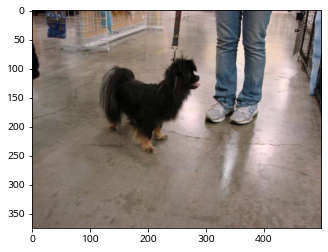

In [54]:
import os
os.getcwd() #C:\\Users\\user\\Desktop\\수업노트\\이강욱강사\\9.DeepLearning\\006975-master
# os.chdir('/Users/user/Desktop/수업노트/이강욱강사/9.DeepLearning/006975-master/datasets/cats_and_dogs_small/validation/cats')
os.chdir('/Users/user/Desktop/수업노트/이강욱강사/9.DeepLearning/006975-master/datasets/cats_and_dogs_small/validation/dogs')

from glob import glob
dogs = glob("*")[:3]
cats = glob("*")[:3]

import cv2
import matplotlib.pyplot as plt
x = plt.imread(cats[0])
plt.imshow(x)
x = cv2.resize(x,(150,150))
x = x.reshape(1,150,150,3)
x = conv_base.predict(x)
shape = 4*4*512
np.where(model.predict(x.reshape(1,shape))>0.5,"강","고")

In [64]:
conv_xception = Xception(weights='imagenet',
                  include_top=False,
                  input_shape=(150, 150, 3))

83697664/83683744 [==============================] - 8s 0us/step


In [68]:
X_train = np.load('./datasets/X_train_ag.npy') 
X_test = np.load('./datasets/X_test.npy')
y_train = np.load('./datasets/y_train_ag.npy')
y_test = np.load('./datasets/y_test.npy')

FileNotFoundError: [Errno 2] No such file or directory: './datasets/X_train_ag.npy'

In [66]:
X = conv_xception.predict(X_train)

In [67]:
#reshape
input_shape = 5*5*2048
X_tr = X.reshape(-1,input_shape)
# output_shape = y_train.shape[1] #1

#
model = Sequential()
model.add(Dense(256, activation='relu', input_shape=(input_shape,)))
model.add(BatchNormalization())
model.add(Dense(output_shape, activation='sigmoid'))

optimizer = 'rmsprop'
loss = 'binary_crossentropy'
metrics = ['accuracy']
model.compile(optimizer=optimizer, loss=loss, metrics=metrics)

epochs = 30
batch_size = 20
model.fit(X_tr,
          y_train, 
          epochs= epochs,
          batch_size = batch_size)

ValueError: Data cardinality is ambiguous:
  x sizes: 960
  y sizes: 6000
Make sure all arrays contain the same number of samples.

In [ ]:
X_te = conv_xception.predict(X_test)
model.evaluate(X_te.reshape(-1,input_shape),y_test)

In [7]:
base_dir = '/Users/user/Desktop/수업노트/이강욱강사/9.DeepLearning/006975-master/datasets/cats_and_dogs_small'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

datagen = ImageDataGenerator(rescale=1./255)
batch_size = 20

def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count, 4, 4, 512))
    labels = np.zeros(shape=(sample_count))
    generator = datagen.flow_from_directory(
        directory,
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary')
    i = 0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i * batch_size : (i + 1) * batch_size] = features_batch
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_count:
            # 제너레이터는 루프 안에서 무한하게 데이터를 만들어내므로 모든 이미지를 한 번씩 처리하고 나면 중지합니다
            break
    return features, labels

train_features, train_labels = extract_features(train_dir, 2000)
validation_features, validation_labels = extract_features(validation_dir, 1000)
test_features, test_labels = extract_features(test_dir, 1000)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [8]:
## data save
original_dir = '/Users/user/Desktop/수업노트/이강욱강사/9.DeepLearning/006975-master/'
os.chdir(original_dir)
try:
    os.mkdir(original_dir+'datasets/')
except OSError:
    pass

# train_data
np.save('./datasets/train_features',train_features)
np.save('./datasets/train_labels',train_labels)
# test_data
np.save('./datasets/test_features',test_features)
np.save('./datasets/test_labels',test_labels)
# validation_data
np.save('./datasets/validation_features',validation_features)
np.save('./datasets/validation_labels',validation_labels)

In [9]:
# dataset load
original_dir = '/Users/user/Desktop/수업노트/이강욱강사/9.DeepLearning/006975-master/'
os.chdir(original_dir)

X_train = np.load('./datasets/train_features.npy')
X_test = np.load('./datasets/test_features.npy')
X_val = np.load('./datasets/validation_features.npy')

y_train = np.load('./datasets/train_labels.npy')
y_test = np.load('./datasets/test_labels.npy')
y_val = np.load('./datasets/validation_labels.npy')

In [ ]:
#reshape
X = X_train.reshape(-1,X_train.shape[1]*X_train.shape[2]*X_train.shape[3])
input_shape = X.shape[1] #4 * 4 * 512
output_shape = y_train.shape[1] #1

#
from tensorflow.keras import optimizers

model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_shape=(input_shape,))) 
model.add(BatchNormalization())
# model.add(layers.Dropout(0.5))
model.add(layers.Dense(output_shape, activation='sigmoid'))

model.compile(optimizer=optimizers.RMSprop(lr=2e-5),
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(train_features, train_labels,
                    epochs=30,
                    batch_size=20,
                    validation_data=(validation_features, validation_labels))